<a href="https://colab.research.google.com/github/AD1N23/omo/blob/main/%D0%9B%D0%A0_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

Чтение файла:

In [ ]:
voice_data = pd.read_csv('voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Проверка на пустые ячейки в таблице:

In [ ]:
voice_data.isnull().sum().sum()

np.int64(0)

Выделение целевого признака:

In [ ]:
X = voice_data.drop('label', axis=1)
y = voice_data['label']

Разделение на тестовую и тренировочную выборки:

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


## Задание 1

Обучение модели:

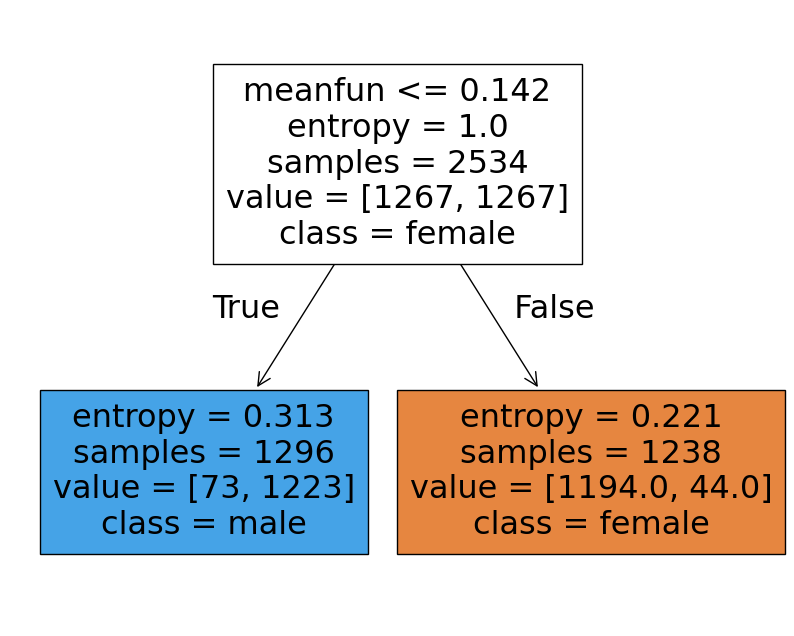

Accuracy (depth=1): 0.956


In [ ]:
from sklearn.tree import plot_tree

tree_model = tree.DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=42)
tree_model.fit(X_train, y_train)

# Визуализация
plt.figure(figsize=(10, 8))
plot_tree(tree_model, feature_names=X.columns, class_names=tree_model.classes_, filled=True)
plt.show()

# Получим предсказания и метрику
y_pred1 = tree_model.predict(X_test)
acc1 = metrics.accuracy_score(y_test, y_pred1)

print(f"Accuracy (depth=1): {acc1:.3f}")

Ответы на вопросы:
1. Решающее правило в корне построено на основе meanfun (среднее значение основной частоты в акустическом спектре)

2. Оптимальное пороговое решение = 0.142
2. Процент наблюдения в левой ветке = 51.1

## Задание 2

Создание модели с глубиной 2:

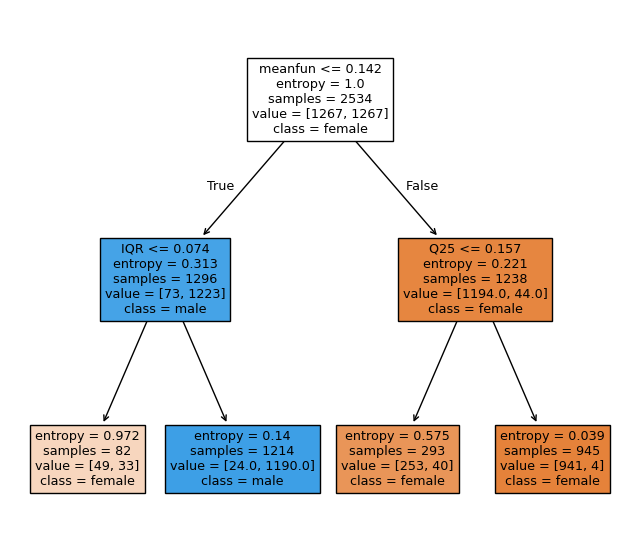

Accuracy (depth=2): 0.956


In [ ]:
tree_model_2 = tree.DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=42)
tree_model_2.fit(X_train, y_train)

# Визуализация
plt.figure(figsize=(8, 7))
plot_tree(tree_model_2, feature_names=X.columns, class_names=tree_model_2.classes_, filled=True)
plt.show()

# Получим предсказания и метрику
y_pred2 = tree_model.predict(X_test)
acc2 = metrics.accuracy_score(y_test, y_pred2)

print(f"Accuracy (depth=2): {acc2:.3f}")

Ответы на вопросы:


1.  При построении данного дерева решений используются:  IQR (межквартильный размах частот), meanfun (средняя основная частота в акустическом спектре), Q25 (первый квартиль частоты)
2.  Построенное дерево содержит 3 листа в качестве предсказания класса female
3. accuracy = 0.956



## Задание 3

In [ ]:
# Обучаем дерево без ограничения глубины
tree_model_full = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_model_full.fit(X_train, y_train)

# Глубина дерева
depth = tree_model_full.get_depth()
leaves = tree_model_full.get_n_leaves()
print(f"Глубина дерева: {depth}")
print(f"Количество листьев: {leaves}")

# Accuracy на обучающей выборке
y_pred_train = tree_model_full.predict(X_train)
acc_train = metrics.accuracy_score(y_train, y_pred_train)

# Accuracy на тестовой выборке
y_pred_test = tree_model_full.predict(X_test)
acc_test = metrics.accuracy_score(y_test, y_pred_test)

print(f"Accuracy на обучающей выборке: {acc_train:.3f}")
print(f"Accuracy на тестовой выборке: {acc_test:.3f}")


Глубина дерева: 12
Количество листьев: 54
Accuracy на обучающей выборке: 1.000
Accuracy на тестовой выборке: 0.973


Ответы на вопросы:
1. Глубина полученного дерева равна 12
2. Количество листьев - 54
3. accuracy на обучающей выборке - 1, на тестовой выборке - 0.973

## Задание 4

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Сетка параметров
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [3, 4, 5, 10]
}

# Стратифицированная кросс-валидация
cv = StratifiedKFold(n_splits=5)

# Модель дерева решений
grid_dt = tree.DecisionTreeClassifier(random_state=0)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=grid_dt,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1
)

# Обучение
grid_search.fit(X_train, y_train)

# Лучшая модель и параметры
best_model = grid_search.best_estimator_
print(best_model.criterion)
print("Лучшая модель:", best_model)
print("Лучшая accuracy на кросс-валидации: {:.3f}".format(grid_search.best_score_))

# Accuracy на обучающей и тестовой выборках
train_acc = metrics.accuracy_score(y_train, best_model.predict(X_train))
test_acc = metrics.accuracy_score(y_test, best_model.predict(X_test))

print(f"Accuracy на обучении: {train_acc:.3f}")
print(f"Accuracy на тесте: {test_acc:.3f}")


gini
Лучшая модель: DecisionTreeClassifier(max_depth=7, min_samples_split=3, random_state=0)
Лучшая accuracy на кросс-валидации: 0.966
Accuracy на обучении: 0.996
Accuracy на тесте: 0.970


Ответы на вопросы:
1. Наилучшая модель использует критерий Джини
2. Оптимальная максимальная глубина = 7
3. Оптимальное минимальное количество объектов для разбиения = 3
4. Accuracy на обучении: 0.996. Accuracy на тесте: 0.970

## Задание 5

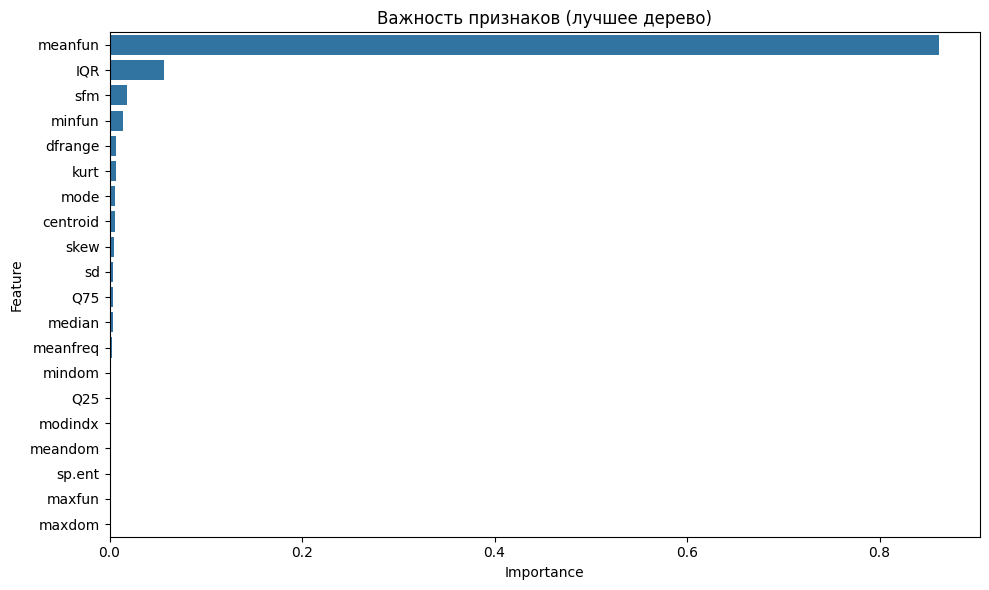

Топ-3 признака по важности:
    Feature  Importance
12  meanfun    0.861347
5       IQR    0.056810
9       sfm    0.018004


In [ ]:
# Получение важности признаков
importances = best_model.feature_importances_

# Создание DataFrame
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance)
plt.title('Важность признаков (лучшее дерево)')
plt.tight_layout()
plt.show()

# Топ-3 признака
top_3 = feat_importance.head(3)
print("Топ-3 признака по важности:")
print(top_3)
